In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [57]:
!nvidia-smi 

Wed Feb  1 05:32:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [58]:
!ls -l /usr/local

total 52
drwxr-xr-x 1 root root 4096 Jan 30 14:52 bin
drwxr-xr-x 3 root root 4096 Jan 30 14:52 colab
lrwxrwxrwx 1 root root   22 Jan 30 14:33 cuda -> /etc/alternatives/cuda
lrwxrwxrwx 1 root root   25 Jan 30 14:33 cuda-11 -> /etc/alternatives/cuda-11
drwxr-xr-x 1 root root 4096 Jan 30 14:31 cuda-11.2
drwxr-xr-x 1 root root 4096 Jan 30 14:47 etc
drwxr-xr-x 2 root root 4096 Oct 19 16:47 games
drwxr-xr-x 2 root root 4096 Jan 30 14:45 _gcs_config_ops.so
drwxr-xr-x 1 root root 4096 Jan 30 14:46 include
drwxr-xr-x 1 root root 4096 Jan 30 14:46 lib
drwxr-xr-x 3 root root 4096 Jan 30 14:45 licensing
lrwxrwxrwx 1 root root    9 Oct 19 16:47 man -> share/man
drwxr-xr-x 2 root root 4096 Oct 19 16:49 sbin
drwxr-xr-x 1 root root 4096 Jan 30 14:46 share
drwxr-xr-x 2 root root 4096 Oct 19 16:47 src
drwxr-xr-x 2 root root 4096 Jan 30 14:46 xgboost


In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
!mkdir /content/yolo_custom_modeling

mkdir: cannot create directory ‘/content/yolo_custom_modeling’: File exists


In [61]:
%cd /content/yolo_custom_modeling

/content/yolo_custom_modeling


In [62]:
!ls -l '/content/drive/MyDrive//Mask_dataset/maskdataset_2C.zip'

-rw------- 1 root root 19681693 Jan 31 09:34 /content/drive/MyDrive//Mask_dataset/maskdataset_2C.zip


In [63]:
!unzip '/content/drive/MyDrive/Mask_dataset/maskdataset_2C.zip'


Archive:  /content/drive/MyDrive/Mask_dataset/maskdataset_2C.zip
   creating: maskdataset_2C/
  inflating: maskdataset_2C/creating-files-data-and-name.py  
  inflating: maskdataset_2C/creating-train-and-test-txt-files.py  
   creating: maskdataset_2C/dataset/
   creating: maskdataset_2C/dataset/images/
  inflating: maskdataset_2C/dataset/images/_111510370_060683565.jpg  
  inflating: maskdataset_2C/dataset/images/_111510370_060683565.txt  
  inflating: maskdataset_2C/dataset/images/images102.jpg  
  inflating: maskdataset_2C/dataset/images/images102.txt  
  inflating: maskdataset_2C/dataset/images/images103.jpg  
  inflating: maskdataset_2C/dataset/images/images103.txt  
  inflating: maskdataset_2C/dataset/images/images19.jpg  
  inflating: maskdataset_2C/dataset/images/images19.txt  
  inflating: maskdataset_2C/dataset/images/images22.jpg  
  inflating: maskdataset_2C/dataset/images/images22.txt  
  inflating: maskdataset_2C/dataset/images/images23.jpg  
  inflating: maskdataset_2C/da

In [64]:
!mv /content/yolo_custom_modeling/maskdataset_2C/* /content/yolo_custom_modeling

mv: cannot move '/content/yolo_custom_modeling/maskdataset_2C/dataset' to '/content/yolo_custom_modeling/dataset': Directory not empty


In [65]:
!rmdir /content/yolo_custom_modeling/maskdataset_2C

rmdir: failed to remove '/content/yolo_custom_modeling/maskdataset_2C': Directory not empty


In [66]:
!ls -l '/content/yolo_custom_modeling'

total 24
drwxr-xr-x  2 root root 4096 Feb  1 05:29 backup
-rw-r--r--  1 root root 2523 Jan 29 12:31 creating-files-data-and-name.py
-rw-r--r--  1 root root 3025 Jan 29 22:42 creating-train-and-test-txt-files.py
drwxr-xr-x 16 root root 4096 Feb  1 05:29 darknet
drwxr-xr-x  4 root root 4096 Feb  1 05:29 dataset
drwxr-xr-x  3 root root 4096 Feb  1 05:32 maskdataset_2C


In [67]:
!pwd


/content/yolo_custom_modeling


In [68]:
classes_text = """no_mask
mask
"""
with open("/content/yolo_custom_modeling/dataset/classes.txt", 'w') as file:
    file.write(classes_text)

In [69]:
%cat /content/yolo_custom_modeling/dataset/classes.txt


no_mask
mask


In [70]:
!python creating-files-data-and-name.py


In [71]:
!ls -l dataset/labelled_data.data 


-rw-r--r-- 1 root root 107 Feb  1 05:32 dataset/labelled_data.data


In [72]:
!python creating-train-and-test-txt-files.py


In [73]:
!ls -l dataset/*.txt


-rw-r--r-- 1 root root   13 Feb  1 05:32 dataset/classes.txt
-rw-r--r-- 1 root root 3521 Feb  1 05:32 dataset/test.txt
-rw-r--r-- 1 root root 3499 Feb  1 05:32 dataset/train.txt


In [74]:
!pwd 


/content/yolo_custom_modeling


In [75]:
!git clone https://github.com/AlexeyAB/darknet.git


fatal: destination path 'darknet' already exists and is not an empty directory.


In [76]:
%ls -l


total 24
drwxr-xr-x  2 root root 4096 Feb  1 05:29 backup/
-rw-r--r--  1 root root 2523 Jan 29 12:31 creating-files-data-and-name.py
-rw-r--r--  1 root root 3025 Jan 29 22:42 creating-train-and-test-txt-files.py
drwxr-xr-x 16 root root 4096 Feb  1 05:29 darknet/
drwxr-xr-x  4 root root 4096 Feb  1 05:29 dataset/
drwxr-xr-x  3 root root 4096 Feb  1 05:32 maskdataset_2C/


In [77]:
%cd darknet/


/content/yolo_custom_modeling/darknet


In [78]:
!ls -l Makefile

-rw-r--r-- 1 root root 5961 Feb  1 05:29 Makefile


In [79]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [80]:
!make


chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iteration_old == 0)
      |      

In [81]:
!pwd


/content/yolo_custom_modeling/darknet


In [82]:
!ls -l darknet


-rwxr-xr-x 1 root root 6714368 Feb  1 05:33 darknet


In [83]:
!chmod +x darknet


In [84]:
!./darknet detector


 CUDA-version: 11020 (11060), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
usage: ./darknet detector [train/test/valid/demo/map] [data] [cfg] [weights (optional)]


In [85]:
!pwd 


/content/yolo_custom_modeling/darknet


In [86]:
%cd ..


/content/yolo_custom_modeling


In [87]:
!mkdir backup


mkdir: cannot create directory ‘backup’: File exists


In [88]:
!ls -l


total 24
drwxr-xr-x  2 root root 4096 Feb  1 05:29 backup
-rw-r--r--  1 root root 2523 Jan 29 12:31 creating-files-data-and-name.py
-rw-r--r--  1 root root 3025 Jan 29 22:42 creating-train-and-test-txt-files.py
drwxr-xr-x 16 root root 4096 Feb  1 05:33 darknet
drwxr-xr-x  4 root root 4096 Feb  1 05:29 dataset
drwxr-xr-x  3 root root 4096 Feb  1 05:32 maskdataset_2C


In [89]:
!ls -l dataset/labelled_data.data


-rw-r--r-- 1 root root 107 Feb  1 05:32 dataset/labelled_data.data


In [90]:
!ls -l dataset/yolov3-tiny-custom.cfg


-rw-r--r-- 1 root root 1967 Oct  6  2021 dataset/yolov3-tiny-custom.cfg


In [91]:
%%time
!darknet/darknet detector train dataset/labelled_data.data dataset/yolov3-tiny-custom.cfg -map -dont_show 


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.853204), count: 5, class_loss = 0.032334, iou_loss = 0.108581, total_loss = 0.140914 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.831450), count: 4, class_loss = 0.086855, iou_loss = 0.056571, total_loss = 0.143426 
 total_bbox = 616212, rewritten_bbox = 0.244396 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.814684), count: 6, class_loss = 0.007617, iou_loss = 0.129579, total_loss = 0.137196 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.791271), count: 6, class_loss = 0.558684, iou_loss = 0.135936, total_loss = 0.694620 
 total_bbox = 616224, rewritten_bbox = 0.244392 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.823175), count: 3, class_loss = 0.008781, iou_loss = 0.165760, total_loss = 0.174542 
v3 (mse loss, Normaliz

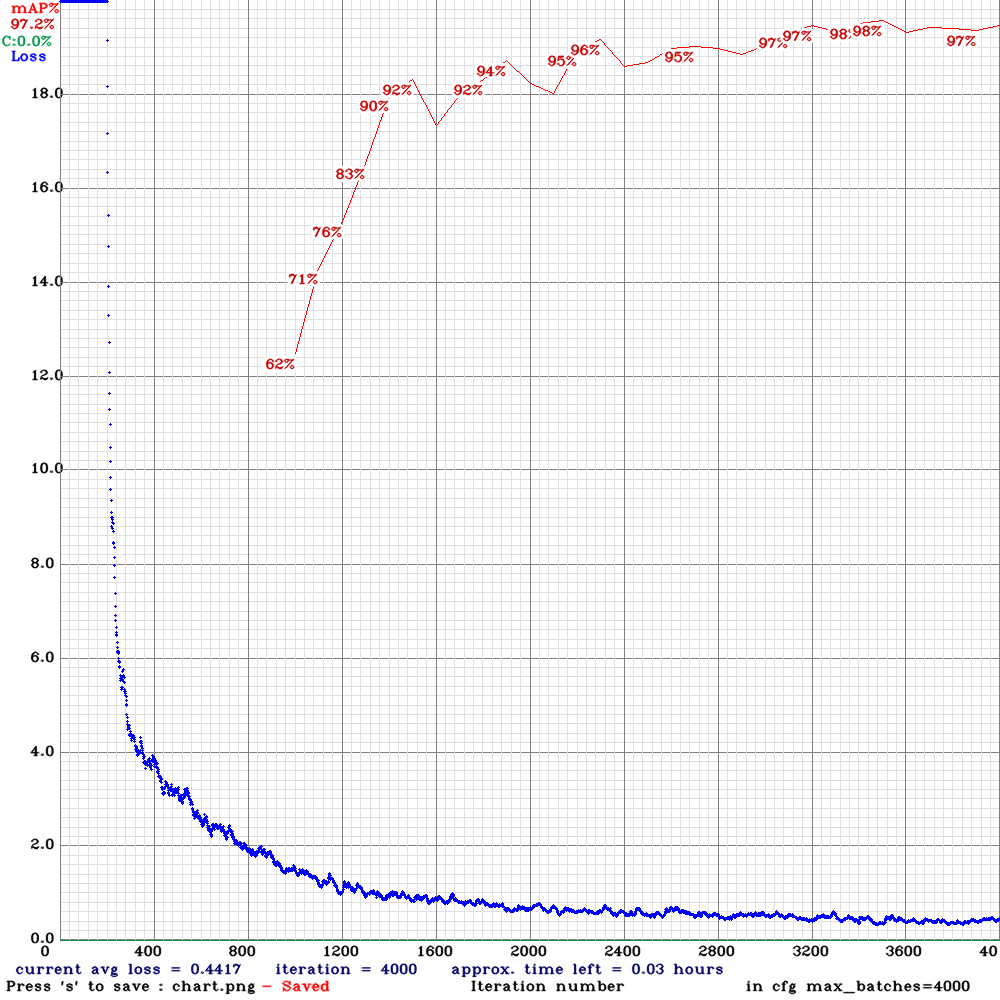

In [92]:
from IPython.display import Image
Image('chart.png')


In [93]:
%cd darknet/


/content/yolo_custom_modeling/darknet


In [94]:
!ls -l ../backup

total 237328
-rw-r--r-- 1 root root 34714236 Feb  1 05:51 yolov3-tiny-custom_1000.weights
-rw-r--r-- 1 root root 34714236 Feb  1 06:08 yolov3-tiny-custom_2000.weights
-rw-r--r-- 1 root root 34714236 Feb  1 06:24 yolov3-tiny-custom_3000.weights
-rw-r--r-- 1 root root 34714236 Feb  1 06:41 yolov3-tiny-custom_4000.weights
-rw-r--r-- 1 root root 34714236 Feb  1 06:32 yolov3-tiny-custom_best.weights
-rw-r--r-- 1 root root 34714236 Feb  1 06:41 yolov3-tiny-custom_final.weights
-rw-r--r-- 1 root root 34714236 Feb  1 06:41 yolov3-tiny-custom_last.weights


In [94]:
!cp -f /content/yolo_custom_modeling/dataset/classes.names /content/yolo_custom_modeling/darknet/data/coco.names


In [94]:
# -- mask_test는 1~5까지 임의로 변경하며 테스트 가능 # last to final
# yolov3-tiny-custom.cfg 에서 Testing의 batch, subdivisions 주석 해제, Training에 주석 달기 
!./darknet detect ../dataset/yolov3-tiny-custom.cfg ../backup/yolov3-tiny-custom_final.weights ../dataset/test/mask_test_1.jpg -dont_show


In [96]:
import matplotlib.image as img 
import matplotlib.pyplot as pp 
fileName = 'predictions.jpg'
ndarray = img.imread(fileName) 
pp.imshow(ndarray) 
pp.show()


FileNotFoundError: ignored

In [95]:
from IPython.display import Image
Image('predictions.jpg')


FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>